# OHP_5_BandMergedCatColorsStarGalSep

[Version Hervé Dole, Université Paris-Saclay - 20240324]

Thanks to Henry J McCracken and M2 astrophysique AAIS IDF OHP1 team for inspiration on some code lines

A partir de 2 catalogues r et g étalonnés générés par OHP_4_ :

Fusionne les catalogues dans un catalogue final

Calcule les couleurs, sépare les étoiles

-> catalogue final fusionné

In [260]:
# Band-Merged Catalog, Colors,Star-Galaxy Separation for OHP1
# updated H. Dole 20221220

# Set up and import appropriate packages
import numpy as np
import sep
from astropy import wcs
from astropy.io import fits
from astropy.io import ascii
from astropy.table import Table, hstack
from astropy.table import Column
from astropy import units as u
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [10., 8.]

from scipy import stats


## 0. Put Path and Filenames here: 2 calibrated catalogs in r and g 

In [261]:
# path for OHP T120 data
# CHANGE HERE WITH YOUR DATA PATH
#path_data_ohp = "/Users/sst/OHP/202103OHP1_M2/DATA/T120/20210303/"
path_data_ohp = "./data3/"

In [262]:
# CHANGE FILENAMES HERE, once r and g fully calibrated catalogs have been generated
file_cat_r = path_data_ohp+'catalog_calibrated_r.dat'
file_cat_g = path_data_ohp+'catalog_calibrated_g.dat' 

## 1. Read 2 catalogs calibrated

In [263]:
# read 2 catalogs, r and g, on 2 files
# ref: https://docs.astropy.org/en/stable/io/ascii/read.html

cat_r = ascii.read(file_cat_r)
cat_g = ascii.read(file_cat_g)

In [264]:
# check catalog is as expected
#cat_g
#cat_r

## 2. Match catalog sources by coordinates

In [265]:
# prepare catalogs for matching
# ref: https://docs.astropy.org/en/stable/coordinates/matchsep.html#matching-catalogs
ra_r = np.array(cat_r.columns[0])
dec_r = np.array(cat_r.columns[1])
ra_g = np.array(cat_g.columns[0])
dec_g = np.array(cat_g.columns[1])

In [266]:
# extract coord info
coord_r = SkyCoord(ra=ra_r, dec=dec_r, unit='deg')
coord_g = SkyCoord(ra=ra_g, dec=dec_g, unit='deg')

In [267]:
# cross match by ra, dec coordinates
idx = coord_r.match_to_catalog_sky(coord_g, nthneighbor=1)

In [268]:
# extract distances btw sources in arcsec
d2d = idx[1] * 3600.
d2d = d2d * u.arcsec / u.degree

In [269]:
#idx
#idx[1]*u.degree
#len(idx)
#len(idx[0])

In [270]:
# define close sources
max_sep = 1.0 * u.arcsec

In [271]:
#max_sep
#d2d[3]

In [272]:
# select close sources
sep_constraint = d2d < max_sep
n_of_matches = np.count_nonzero(sep_constraint)
print('number of matched sources: ', n_of_matches)

number of matched sources:  264


In [273]:
# apply selection of good matches on catalogs
cat_r_matches = cat_r[sep_constraint]
cat_g_matches = cat_g[idx[0][sep_constraint]]

In [274]:
# get separations
#d2dgood_tmp = d2d[sep_constraint]

In [275]:
#check
#cat_g_matches
#cat_r_matches

## 3. Merge matched catalogs and create final band-merged catalog 

In [276]:
cat_band_merged = hstack([cat_r_matches, cat_g_matches])
#cat_band_merged = hstack([cat_r_matches, cat_g_matches, d2dgood])

In [277]:
cat_band_merged

ra_in_1,dec_in_1,magr_ohp,flux_radius_1,ra_in_2,dec_in_2,magg_ohp,flux_radius_2
float64,float64,float64,float64,float64,float64,float64,float64
240.56959541352415,16.048212308162046,19.38778352062785,1.5850949213914542,240.56955381555503,16.048204912383284,19.713078133521716,1.742136750930595
240.56247115125913,16.04825752892456,17.54395283819564,1.7539715563418863,240.56242809881962,16.04822761187009,18.27752461664716,1.9149966478884592
240.57763295467487,16.047551232653205,19.229211388431317,1.6437721954143323,240.5776346136366,16.047499436387582,20.54182044646079,1.7044273901171572
240.64996440056944,16.046939079966343,18.442317291182952,1.5073108857494923,240.64997268993523,16.04693769080648,19.37486053912528,1.9640967144230055
240.4423828780085,16.04782262138784,16.626663818235034,1.821070526519728,240.44226523722517,16.047777348332378,16.64377416487799,1.9206834091089309
240.55272423540794,16.0461369697334,18.65086564638061,1.7131430066449815,240.55264470927818,16.046133020437182,19.210717926072654,1.9380272901539723
240.60826999753922,16.04445136798986,18.04205435361787,1.7122566436079671,240.60827154800694,16.04446371827217,18.183853362543257,2.0599905395592777
240.47504003121566,16.04365708580656,15.877332174580882,1.901821316662153,240.47491036401422,16.043667286959202,15.966655764344988,2.1359854843498125
240.58027813530714,16.042023574635582,18.501088418023347,1.7393518086816082,240.58025422044213,16.042037842404344,18.491260014514168,2.0663902501820792


In [278]:
print(cat_band_merged)

     ra_in_1            dec_in_1           magr_ohp        flux_radius_1         ra_in_2            dec_in_2           magg_ohp        flux_radius_2   
------------------ ------------------ ------------------ ------------------ ------------------ ------------------ ------------------ ------------------
240.56959541352415 16.048212308162046  19.38778352062785 1.5850949213914542 240.56955381555503 16.048204912383284 19.713078133521716  1.742136750930595
240.56247115125913  16.04825752892456  17.54395283819564 1.7539715563418863 240.56242809881962  16.04822761187009  18.27752461664716 1.9149966478884592
240.57763295467487 16.047551232653205 19.229211388431317 1.6437721954143323  240.5776346136366 16.047499436387582  20.54182044646079 1.7044273901171572
240.64996440056944 16.046939079966343 18.442317291182952 1.5073108857494923 240.64997268993523  16.04693769080648  19.37486053912528 1.9640967144230055
 240.4423828780085  16.04782262138784 16.626663818235034  1.821070526519728 240.44226523

## 4. Compute g-r color

In [279]:
# compute g-r color of sources 
#color_g_r = cat_g_matches.columns[2] - cat_r_matches.columns[2]
#color_g_r = cat_band_merged.columns[4] - cat_band_merged.columns[2]
color_g_r = cat_band_merged['magg_ohp'] - cat_band_merged['magr_ohp'] 

In [280]:
#color_g_r

In [281]:
#len(color_g_r)
#color_g_r
#cat_band_merged.columns[2]

In [282]:
# add g-r color of sources in a new column
cat_band_merged.add_column(color_g_r, name='color_g_r')

In [283]:
# check it actually happened
cat_band_merged

ra_in_1,dec_in_1,magr_ohp,flux_radius_1,ra_in_2,dec_in_2,magg_ohp,flux_radius_2,color_g_r
float64,float64,float64,float64,float64,float64,float64,float64,float64
240.56959541352415,16.048212308162046,19.38778352062785,1.5850949213914542,240.56955381555503,16.048204912383284,19.713078133521716,1.742136750930595,0.32529461289386674
240.56247115125913,16.04825752892456,17.54395283819564,1.7539715563418863,240.56242809881962,16.04822761187009,18.27752461664716,1.9149966478884592,0.7335717784515197
240.57763295467487,16.047551232653205,19.229211388431317,1.6437721954143323,240.5776346136366,16.047499436387582,20.54182044646079,1.7044273901171572,1.312609058029473
240.64996440056944,16.046939079966343,18.442317291182952,1.5073108857494923,240.64997268993523,16.04693769080648,19.37486053912528,1.9640967144230055,0.932543247942327
240.4423828780085,16.04782262138784,16.626663818235034,1.821070526519728,240.44226523722517,16.047777348332378,16.64377416487799,1.9206834091089309,0.017110346642954966
240.55272423540794,16.0461369697334,18.65086564638061,1.7131430066449815,240.55264470927818,16.046133020437182,19.210717926072654,1.9380272901539723,0.5598522796920449
240.60826999753922,16.04445136798986,18.04205435361787,1.7122566436079671,240.60827154800694,16.04446371827217,18.183853362543257,2.0599905395592777,0.14179900892538555
240.47504003121566,16.04365708580656,15.877332174580882,1.901821316662153,240.47491036401422,16.043667286959202,15.966655764344988,2.1359854843498125,0.08932358976410626
240.58027813530714,16.042023574635582,18.501088418023347,1.7393518086816082,240.58025422044213,16.042037842404344,18.491260014514168,2.0663902501820792,-0.009828403509178685


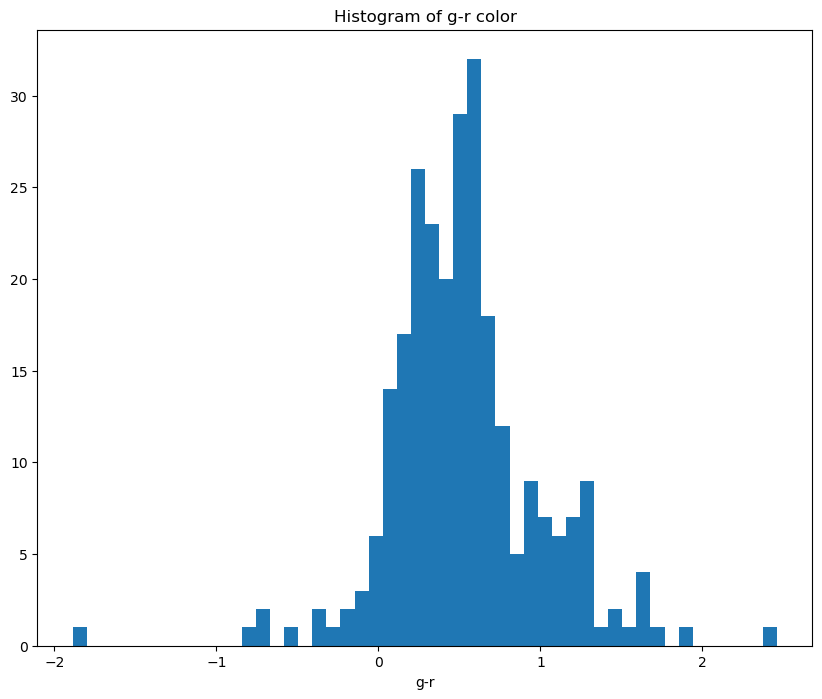

In [284]:
# quick histograms for checks
n, bins, patches = plt.hist(color_g_r, 50)
plt.title('Histogram of g-r color')
plt.xlabel("g-r")
plt.show()

## 5. Star-Galaxy Separation

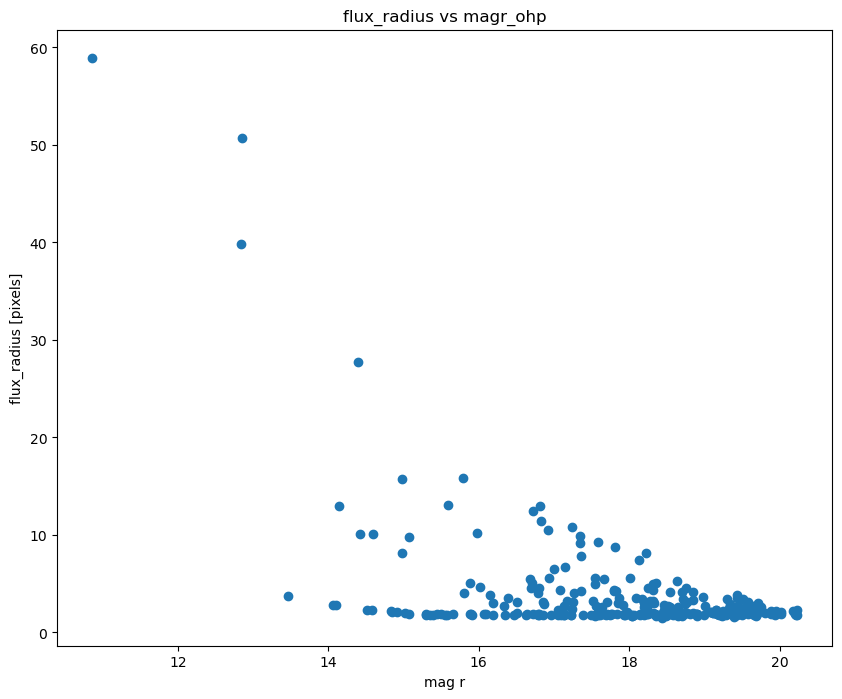

In [285]:
# plot flux_radius_1 (en r) vs mag r to isolate stars
plt.scatter(cat_band_merged['magr_ohp'], cat_band_merged['flux_radius_1'])
plt.title("flux_radius vs magr_ohp")
plt.ylabel("flux_radius [pixels]")
plt.xlabel("mag r")
plt.show()

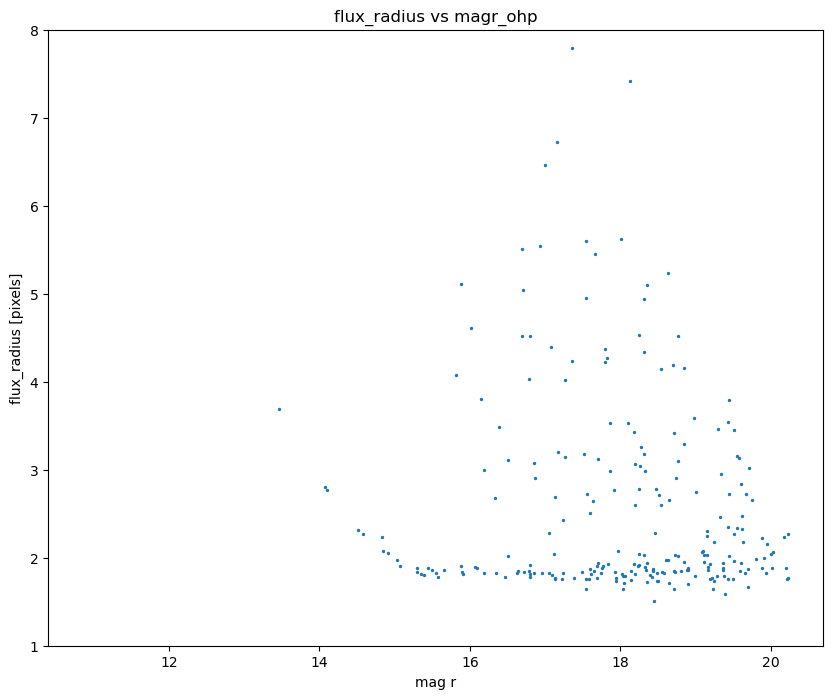

In [286]:
# zoom in to decide which threshold to take
# plot flux_radius_1 (en r) vs mag r to isolate stars
plt.scatter(cat_band_merged['magr_ohp'], cat_band_merged['flux_radius_1'], s=2)
plt.title("flux_radius vs magr_ohp")
plt.ylabel("flux_radius [pixels]")
plt.xlabel("mag r")
plt.ylim(1, 8)
plt.show()

In [287]:
# choose threshold in flux_radius for star-galaxy separation. Above=galaxy; Below=star.
flux_radius_threshold = 2.5


In [288]:
# select stars
flux_radius_constrain =  ( cat_band_merged['flux_radius_1'] < flux_radius_threshold ) | (  (cat_band_merged['flux_radius_1'] < 5) & (cat_band_merged['magr_ohp'] < 15.5) )

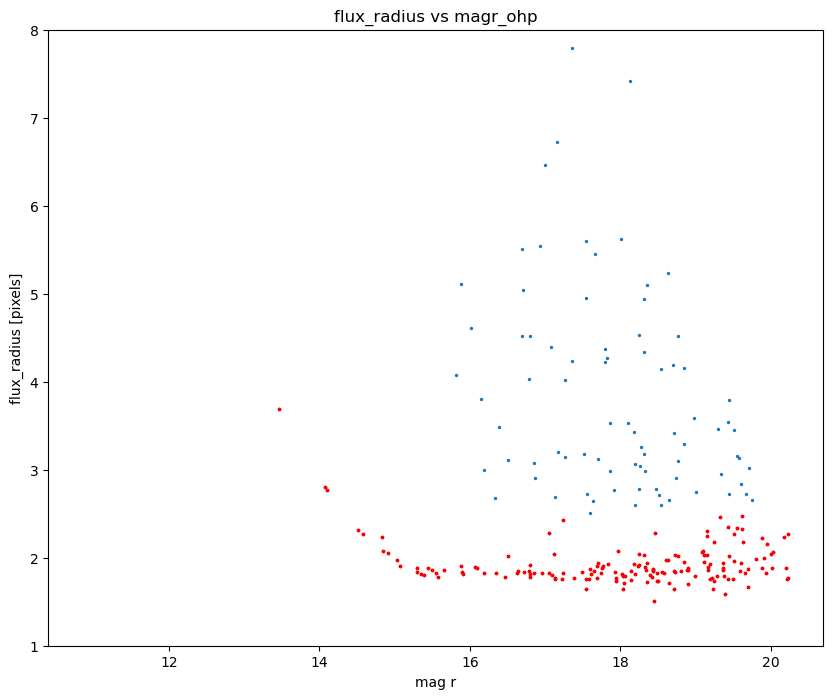

In [289]:
# show selected stars
# zoom in to decide which threshold to take
# plot flux_radius_1 (en r) vs mag r to isolate stars
plt.scatter(cat_band_merged['magr_ohp'], cat_band_merged['flux_radius_1'], s=2)
plt.title("flux_radius vs magr_ohp")
plt.ylabel("flux_radius [pixels]")
plt.xlabel("mag r")
plt.ylim(1, 8)

plt.scatter(cat_band_merged['magr_ohp'][flux_radius_constrain], cat_band_merged['flux_radius_1'][flux_radius_constrain], s=3, c='red')

plt.show()

In [290]:
#flux_radius_constrain
n_stars = np.count_nonzero(flux_radius_constrain)
print('n_stars: ', n_stars)
print('number sources: ', n_of_matches)
print('fraction of stars: ', float(n_stars) / float(n_of_matches))

n_stars:  160
number sources:  264
fraction of stars:  0.6060606060606061


In [291]:
# Create a new column star or galaxy
#stargal = Column(name='star_gal', dtype='str', shape=(6), length=n_of_matches )
stargal = np.chararray((n_of_matches), itemsize=6)
stargal[:] = 'galaxy'

In [292]:
cat_band_merged.add_column(stargal, name='stargal')

In [293]:
# now udpate stargal flag
cat_band_merged['stargal'][flux_radius_constrain] = 'star'

In [297]:
#cat_band_merged

## 6. Save final band-merged catalog with all sources

In [298]:
# save final band-merged catalog
# write on disk ascii/txt file
# ref: https://docs.astropy.org/en/stable/io/ascii/write.html
output_catalog_file = path_data_ohp+'catalog_band_merged_r_g_all.dat'
cat_band_merged.write(output_catalog_file, format='ascii', overwrite=True)  

## 7. Save final band-merged catalog only with galaxies

In [299]:
galaxies_constrain = cat_band_merged['stargal'] == 'galaxy'
cat_band_merged_galaxies = cat_band_merged[galaxies_constrain]

In [300]:
output_catalog_file = path_data_ohp+'catalog_band_merged_r_g_galaxies.dat'
cat_band_merged_galaxies.write(output_catalog_file, format='ascii', overwrite=True)  

## 8. Check: g-r colors of galaxies only

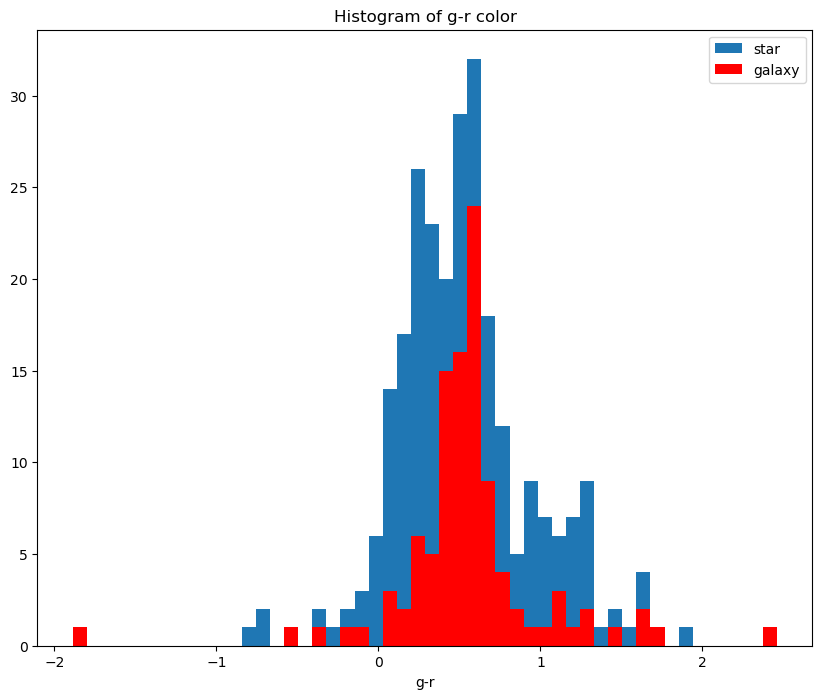

In [312]:
n, bins, patches = plt.hist(cat_band_merged['color_g_r'], 50)
plt.title('Histogram of g-r color')
plt.xlabel("g-r")

n, bins, patches = plt.hist(cat_band_merged_galaxies['color_g_r'], 50, color='red')

plt.legend(labels=['star', 'galaxy'])
plt.show()

In [296]:
# TODO: add uncertainties in mag and color